In [12]:
#Importing necessary libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [13]:
# Grabbing the clean data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D206/clean_churn.csv", index_col= [0])

In [14]:
#Storing variables for PCA in a new data frame
cd_pca = cd[["latitude", "longitude", "population", "children", "age", "income", "email_sent", "tech_support_contact", "yearly_equip_failure", "tenure", "monthly_charge", "bandwidth_gb_year"]]

In [15]:
#Normalizing the data by dividing the mean and standard deviation for each variable
cd_pca_normalized = (cd_pca-cd_pca.mean())/cd_pca.std()

In [16]:
#Setting size of the PCA in terms of number of input components
pca = PCA(n_components=cd_pca.shape[1])

In [17]:
#Normalizing fit
pca.fit(cd_pca_normalized)

PCA(n_components=12)

In [18]:
#Labling the columns in the dataframe 
cd_pca_df = pd.DataFrame(pca.transform(cd_pca_normalized)),
columns= ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"]

In [19]:
cd_pca_loadings = pd.DataFrame(pca.components_.T, 
                              columns= ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"],
                              index = cd_pca_normalized.columns)

In [20]:
cd_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
latitude,-0.023646,-0.715312,0.125143,-0.002445,-0.076150,0.000993,-0.011501,0.067094,0.062221,-0.021249,0.676273,-0.000987
longitude,0.008009,0.175241,-0.734172,-0.358744,0.113459,0.051695,-0.155801,-0.183749,-0.219942,0.197480,0.374918,-0.000910
population,0.005153,0.654113,0.291974,0.212289,0.007852,0.031273,0.142941,0.001595,0.069380,-0.129524,0.631451,0.000675
children,-0.001794,-0.033985,-0.534155,0.346412,-0.005421,0.024302,0.048573,0.275542,0.337155,-0.632783,-0.013946,0.018292
age,-0.011870,0.015856,0.171928,-0.434831,0.476446,-0.084388,0.015153,0.511866,-0.382015,-0.371643,0.009657,-0.021571
income,0.005617,-0.056578,-0.075304,0.204646,0.291301,0.736312,0.350420,0.281006,-0.015356,0.345955,-0.022891,-0.001066
email_sent,-0.020649,0.153557,-0.030105,-0.243381,-0.499136,-0.018534,-0.215954,0.678448,0.258384,0.303362,0.024982,-0.005525
tech_support_contact,0.004762,0.029454,0.151285,-0.479065,0.270298,0.296074,-0.189033,-0.230995,0.693012,-0.127909,-0.016478,0.002956
yearly_equip_failure,0.015620,-0.007974,-0.070914,0.268127,0.575737,-0.528463,-0.075708,0.171171,0.316823,0.418573,0.037544,0.002350
tenure,0.705101,-0.011167,0.021233,0.002197,-0.001666,0.017694,-0.058293,0.024043,-0.026029,-0.005108,0.008595,0.705112


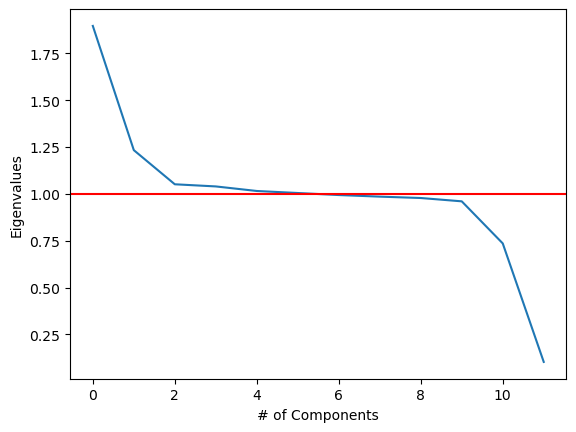

In [21]:
covar_matrix = np.dot(cd_pca_normalized.T, cd_pca_normalized) / cd_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [22]:
eigenvalues

[1.8966793499602992,
 1.2335749183429727,
 1.0513931129137895,
 1.0399231329475305,
 1.0155861697283426,
 1.004836213847584,
 0.9939338410226858,
 0.9854379426559764,
 0.9781318949818298,
 0.9603580981545289,
 0.7357776138543958,
 0.10316771159016593]